# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Random Forest

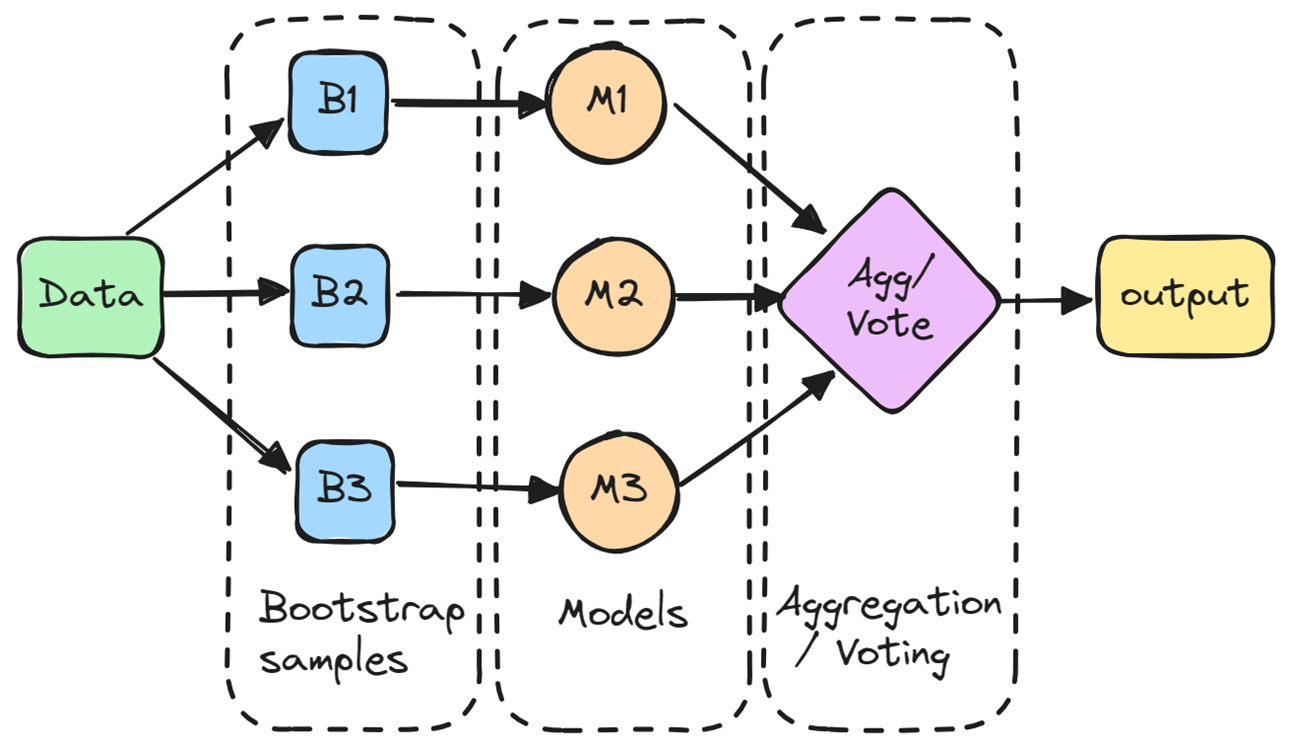
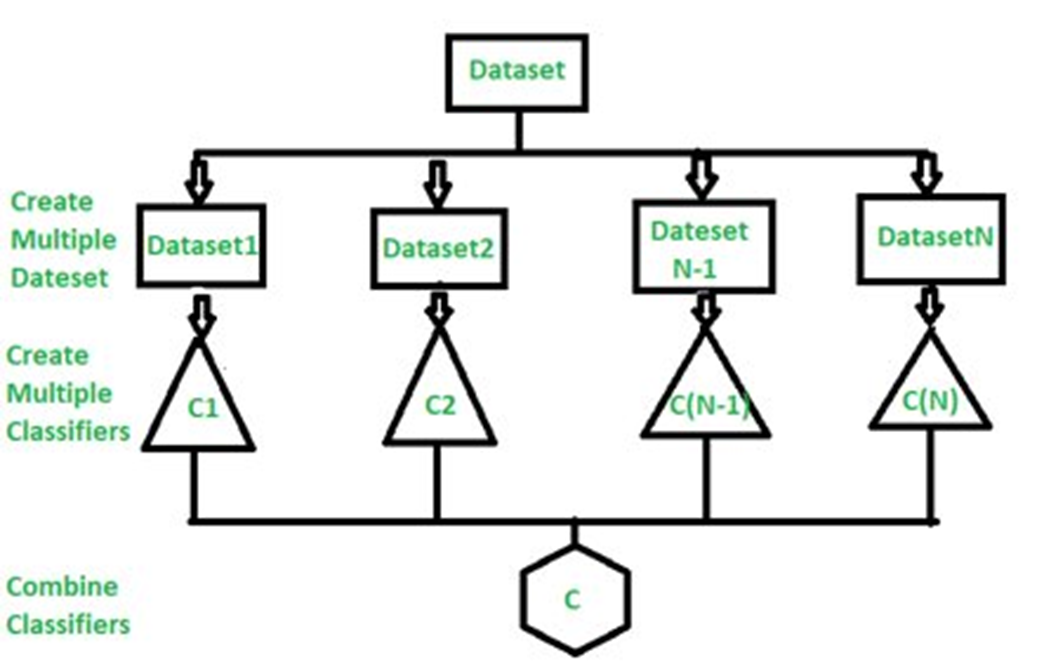

# Load csv file

In [2]:
df=pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Describe

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# Split X and Y

In [7]:
x=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [8]:
print("***** Independent Values(x) *****")

print("***** Its Shape *****")
print(x.shape)

x.head()

***** Independent Values(x) *****
***** Its Shape *****
(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [9]:
print("***** Dependent Values(y) *****")

print("***** Its Shape *****")
print(y.shape)

y.head()


***** Dependent Values(y) *****
***** Its Shape *****
(299,)


0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split into Train and Test

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

# Model Fitting

In [11]:
rf = RandomForestClassifier()

In [12]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# Predict on test data

In [13]:
#Testing on test datas
y_pred=rf.predict(x_test)

print(y_pred)

[1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1]


# Evaluation Metrices

In [14]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [15]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.9166666666666666
Recall-Score : 0.8333333333333334
Precision-Score : 0.8823529411764706
F1-Score : 0.8571428571428571


# Classification Report

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.88      0.83      0.86        18

    accuracy                           0.92        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



# Confusion Matrix

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

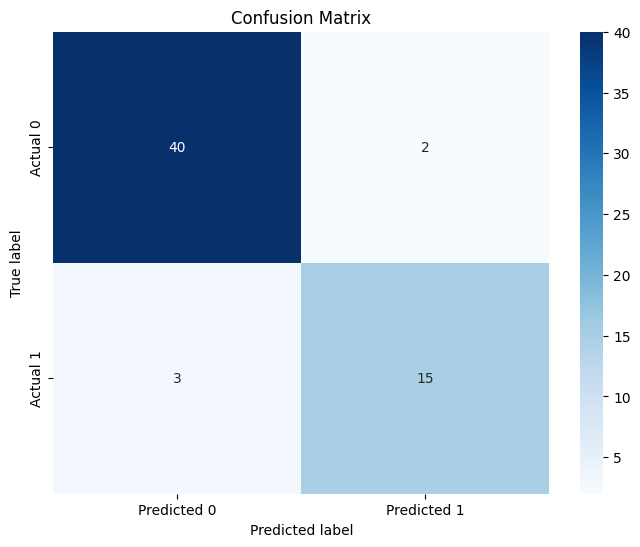

In [18]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# AdaBoostClassifier

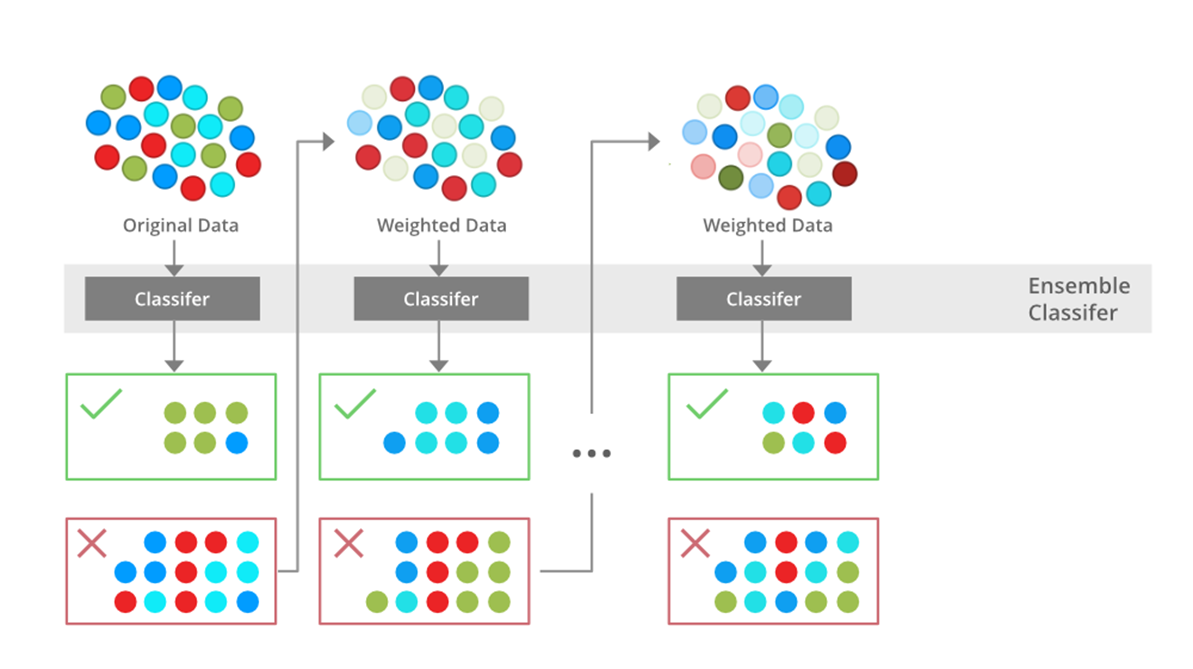

# Model Fiting

In [19]:
ab = AdaBoostClassifier()

In [20]:
ab.fit(x_train, y_train)

AdaBoostClassifier()

# Predict on test data

In [21]:
#Testing on test datas
y_pred=ab.predict(x_test)

print(y_pred)

[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1]


# Evaluation Metrics

In [22]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [23]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.7666666666666667
Recall-Score : 0.5714285714285714
Precision-Score : 0.7058823529411765
F1-Score : 0.6315789473684211


# Classification Report

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.71      0.57      0.63        21

    accuracy                           0.77        60
   macro avg       0.75      0.72      0.73        60
weighted avg       0.76      0.77      0.76        60



# Confusion Matrix

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

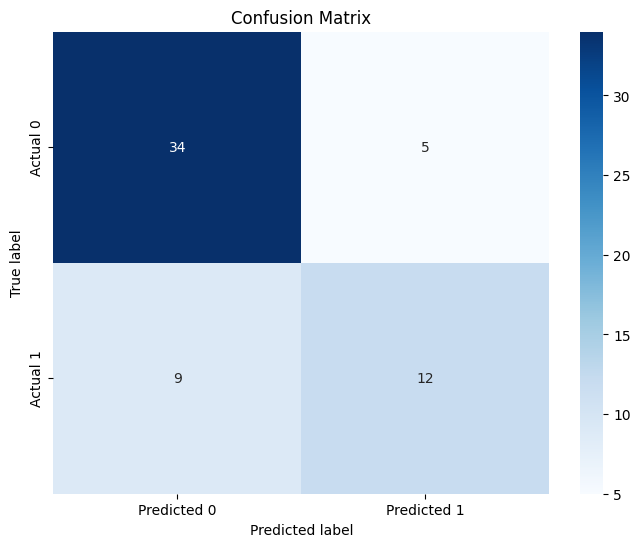

In [26]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Test by removing Outliers

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

# Get X and Y

In [28]:
x=df_no_outliers.drop(columns=['DEATH_EVENT'])
y=df_no_outliers['DEATH_EVENT']

In [29]:
print("***** Independent Values(x) *****")

print("***** Its Shape *****")
print(x.shape)

x.head()

***** Independent Values(x) *****
***** Its Shape *****
(224, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10


In [30]:
print("***** Dependent Values(y) *****")

print("***** Its Shape *****")
print(y.shape)

y.head()


***** Dependent Values(y) *****
***** Its Shape *****
(224,)


0    1
2    1
3    1
5    1
6    1
Name: DEATH_EVENT, dtype: int64

# Split into Train and Test

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

# Model Fitting

In [32]:
ab = AdaBoostClassifier(n_estimators=55)

In [33]:
ab.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=55)

# Predict on test data

In [34]:
#Testing on test datas
y_pred=ab.predict(x_test)

print(y_pred)

[0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 1 0 0]


# Evaluation Metrics

In [35]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [36]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.9555555555555556
Recall-Score : 0.9
Precision-Score : 0.9
F1-Score : 0.9


# Classification Report

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.90      0.90      0.90        10

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



# Confusion Matrix

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

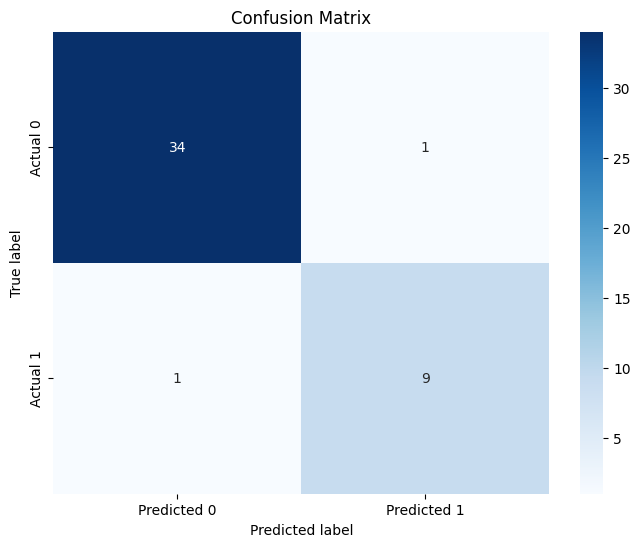

In [39]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Grid Search CV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [41]:

svc=SVC() # optional Takes time
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()

models={'svc':svc ,'dtc':dtc,'rfc':rfc,'ada':ada}

# params
params={    
    'svc': {'C':[0.1,1,10], 
            'kernel':['rbf','linear']},
    
    'dtc':{
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10,12]
    },
    
    'rfc':{
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10,12]
    },
    'ada':{
        'n_estimators':[2,4,6,8,10,12]

    },
    
}

# train

model_accuracy={}
score=0.0001
for model in models.keys():
    mod = GridSearchCV(
    models[model],
    params[model],
    verbose=0, #Progress bar showing
    cv=3, #cross validation
    
)
    gridsearch_result=mod.fit(x_train,y_train)
    
    #selects best model
    if(score < float(gridsearch_result.score(x_test,y_test))):
            score=gridsearch_result.score(x_test,y_test)
            best_model=gridsearch_result
            
    predict=mod.predict(x_test)
    print(f"{model} : ",gridsearch_result.best_estimator_)
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(y_test,predict)})

# Check model_accuracy

print(model_accuracy)

print(best_model.best_estimator_)
best_model.best_score_


svc :  SVC(C=1, kernel='linear')
dtc :  DecisionTreeClassifier(max_depth=2)
rfc :  RandomForestClassifier(max_depth=6)
ada :  AdaBoostClassifier(n_estimators=4)
{'svc': 0.7777777777777778, 'dtc': 0.8888888888888888, 'rfc': 0.8888888888888888, 'ada': 0.8888888888888888}
DecisionTreeClassifier(max_depth=2)


0.8042372881355933

# Assignment

<li> Try predicting on custom data </li>